# 단순 선형 회귀

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# 데이터 생성
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

In [4]:
# X의 형태를 변환하여 train_X에 저장
train_X = pd.DataFrame(X, columns=['X'])

# Y의 형태를 변환하여 train_Y에 저장
train_Y = pd.Series(Y)

# 변환된 데이터를 출력
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))

전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


In [6]:
# 모델 초기화
lrmodel = LinearRegression()

# train data로 학습
lrmodel.fit(train_X, train_Y)

LinearRegression()

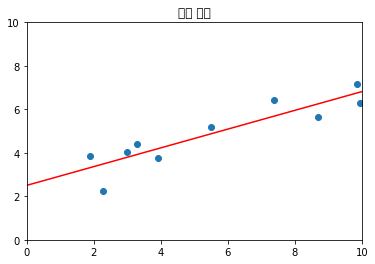

In [12]:
# 학습 결과 시각화
plt.scatter(X,Y)
plt.plot([0,10], [lrmodel.intercept_, 10*lrmodel.coef_[0]+lrmodel.intercept_], c='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('학습 결과')
plt.show()

In [14]:
print(lrmodel.intercept_, '\n')
beta_0 = lrmodel.intercept_ # beta0, 상수 값(bias)

2.5061811708934925 



In [13]:
print(lrmodel.coef_, '\n')
beta_1 = lrmodel.coef_[0] # beta1, 계수 값(weight)

[0.43078118] 



In [16]:
# 단순선형회귀 예측
pred_X = lrmodel.predict(train_X) # 테스트 데이터가 없으므로 학습데이터 사용(원래 이러면 안됨)

print(f'train_X 예측값 : \n {pred_X} \n')
print(f'train_Y 실제값 : \n {train_Y} \n')

train_X 예측값 : 
 [6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749] 

train_Y 실제값 : 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64 



# 다중 선형 회귀

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/통계학 머신러닝_양진욱/data/Advertising.csv')

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,FB,TV,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FB         200 non-null    float64
 1   TV         200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
# Sales 변수는 label 데이터로 Y에 저장하고 나머진 X에 저장

X = df.drop(columns=['Sales'])
Y = df['Sales']

print('X의 데이터 개수:%d'%(len(X)))
print('Y의 데이터 개수:%d'%(len(Y)))

# train/test 데이터 분리

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2, random_state=42)

print('학습한 데이터 개수 : %d' % len(train_X))
print('검증 데이터 개수 : %d' % len(test_X))

X의 데이터 개수:200
Y의 데이터 개수:200
학습한 데이터 개수 : 160
검증 데이터 개수 : 40


In [25]:
# 모델 학습
lrmodel = LinearRegression() # 선형회귀 객체 생성
lrmodel.fit(train_X, train_Y) # 훈련데이터로 학습 진행

# 학습 결과 intercept와 coefficient 출력
print(lrmodel.intercept_, '\n')
beta_0 = lrmodel.intercept_ # 상수 값(bias)
print(lrmodel.coef_, '\n')
beta_1 = lrmodel.coef_[0] # 계수 값(weight)
beta_2 = lrmodel.coef_[1] 
beta_3 = lrmodel.coef_[2]
# 따라서 도출된 회귀식은 sales=0.04473*FB+0.1892*TV+0.0028Newpaper+2.9791

2.979067338122629 

[0.04472952 0.18919505 0.00276111] 



In [14]:
# 예측
pred_X = lrmodel.predict(test_X) 

print(f'test_X 예측값 : \n {pred_X} \n')
print(f'test_Y 실제값 : \n {test_Y} \n')

test_X 예측값 : 
 [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622] 

test_Y 실제값 : 
 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
N

In [16]:
df1 = pd.DataFrame(np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1]]), columns=['FB','TV','Newspaper'])
pred_df1 = lrmodel.predict(df1) 
print(f'df1 예측값 : \n {pred_df1} \n')

df1 예측값 : 
 [2.97906734 3.02379686 3.16826239 2.98182845 3.21575302] 



In [26]:
# 회귀 알고리즘 평가지표_MSE,MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# train_X data의 MSE,MAE 계산
pred_train = lrmodel.predict(train_X)

MAE_train = mean_absolute_error(train_Y, pred_train)
MSE_train = mean_squared_error(train_Y, pred_train)
print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

MSE_train : 2.705129
MAE_train : 1.198468


In [32]:
pred_test = lrmodel.predict(test_X)
MAE_test = mean_absolute_error(test_Y, pred_test)
MSE_test = mean_squared_error(test_Y, pred_test)
print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_test : 3.174097
MAE_test : 1.460757


In [29]:
# train_X 결정계수(R2 score)

R2_train = r2_score(train_Y, pred_train)
print('R2_train : %f' % R2_train)

R2_train : 0.895701


In [30]:
# test_X 결정계수

pred_test = lrmodel.predict(test_X)
R2_test = r2_score(test_Y,pred_test)
print('R2_test : %f' % R2_test)

R2_test : 0.899438
